# Task: Determine the eligibility for granting a Home Loan
Objective of this notebook is:

1.   To understand the patterns in the data.
2.   How to Handle the categorical features.
3. How to deal with missing data.
4. Feature Engineering
5. Finding the most important features while taking the decision of granting a loan application.
6. Understanding the Normalization and standardisation of the data.

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp,ttest_ind,chi2_contingency,shapiro
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import kstest,norm

In [3]:
df = pd.read_csv('loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Log Normal Distribution


In [4]:
data=pd.read_csv("waiting_time.csv")
data

,time
0,184.003075
1,36.721521
2,29.970417
3,75.640285
4,61.489439
...,...
90041,135.885984
90042,15.223970
90043,207.839528
90044,140.488418


<AxesSubplot:xlabel='time', ylabel='Count'>

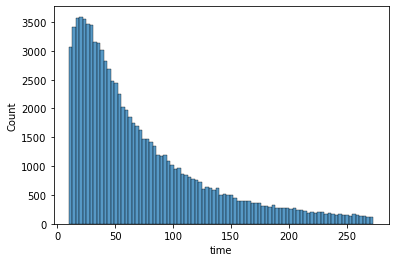

In [5]:
sns.histplot(data["time"])

In [7]:
x1=10
x2=100
x3=1000
x4=10000

In [13]:
print("x1 :",x1,"| log(x1) : ", np.log(x1))
print("x2 :",x2,"| log(x2) : ", np.log(x2))
print("x3 :",x3,"| log(x3) : ", np.log(x3))
print("x4 :",x4,"| log(x4) : ", np.log(x4))

x1 : 10 | log(x1) :  2.302585092994046
x2 : 100 | log(x2) :  4.605170185988092
x3 : 1000 | log(x3) :  6.907755278982137
x4 : 10000 | log(x4) :  9.210340371976184


In [14]:
np.log(data["time"])

0        5.214952
1        3.603363
2        3.400211
3        4.325989
4        4.118865
           ...   
90041    4.911816
90042    2.722871
90043    5.336766
90044    4.945125
90045    3.926311
Name: time, Length: 90046, dtype: float64

<AxesSubplot:xlabel='time', ylabel='Count'>

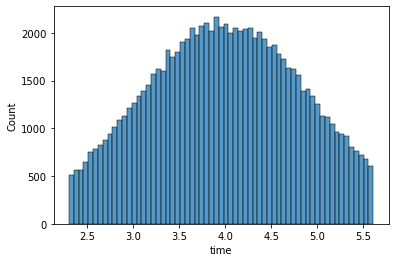

In [15]:
sns.histplot(np.log(data["time"]))

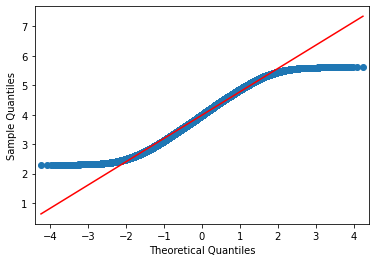

In [18]:
qqplot(np.log(data["time"]),line="s")
plt.show()

In [19]:
log_data=np.log(data["time"])
log_data

0        5.214952
1        3.603363
2        3.400211
3        4.325989
4        4.118865
           ...   
90041    4.911816
90042    2.722871
90043    5.336766
90044    4.945125
90045    3.926311
Name: time, Length: 90046, dtype: float64

In [20]:
z_log_data=(log_data-log_data.mean())/log_data.std()
z_log_data

0        1.554521
1       -0.484198
2       -0.741193
3        0.429950
4        0.167931
           ...   
90041    1.171043
90042   -1.598052
90043    1.708620
90044    1.213180
90045   -0.075657
Name: time, Length: 90046, dtype: float64

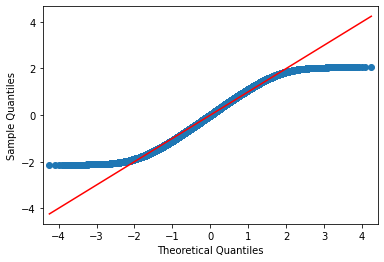

In [22]:
qqplot(z_log_data,line="s")
plt.show()

<AxesSubplot:xlabel='time', ylabel='Density'>

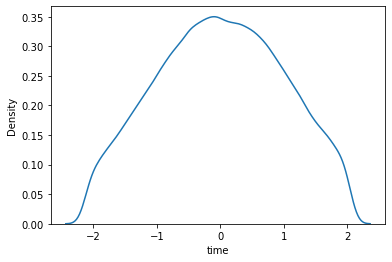

In [24]:
sns.kdeplot(z_log_data)


In [25]:
shapiro(z_log_data)

/Users/nikhilsanghi/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.984922468662262, pvalue=0.0)

In [26]:
kstest(z_log_data,norm.cdf)

KstestResult(statistic=0.026341647509834476, pvalue=1.034110663995602e-54)

# Basic Exploration

In [27]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [29]:
df["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [30]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


/Users/nikhilsanghi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

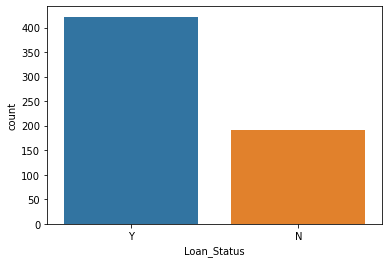

In [31]:
sns.countplot(df["Loan_Status"])

# Univariate Analysis

In [32]:
"Applicant_Income"

'Applicant_Income'

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

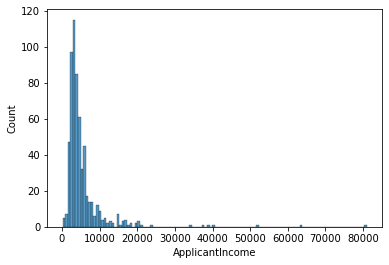

In [34]:
sns.histplot(df["ApplicantIncome"])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

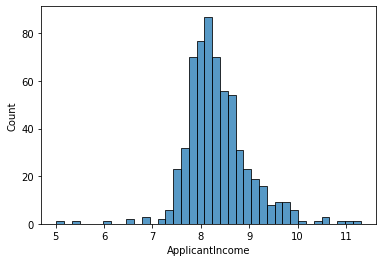

In [35]:
sns.histplot(np.log(df["ApplicantIncome"]))

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

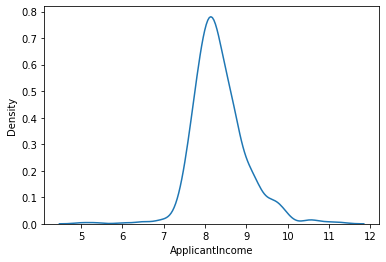

In [36]:
sns.kdeplot(np.log(df["ApplicantIncome"]))

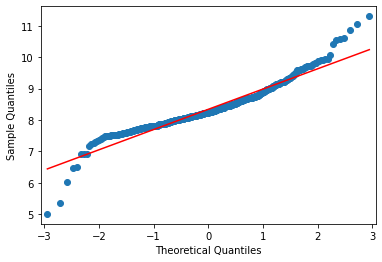

In [39]:
qqplot(np.log(df["ApplicantIncome"]),line="s")
plt.show()

# Applicant Income is Important/ Good Predictor?

In [42]:
df.groupby("Loan_Status").mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,5446.078125,1877.807292,151.220994,344.064516,0.541899
Y,5384.068720,1504.516398,144.294404,341.072464,0.981818


In [ ]:
# Ho : Acc = Rej
# Ha : Acc !=Rej

In [49]:
df_acc= df.loc[df["Loan_Status"]=="Y"]["ApplicantIncome"]
df_rej= df.loc[df["Loan_Status"]=="N"]["ApplicantIncome"]


In [50]:
df_acc.mean()

5384.068720379147

In [52]:
df_rej.mean()

5446.078125

In [53]:
ttest_ind(df_acc,df_rej,alternative="less")

Ttest_indResult(statistic=-0.11650844828724542, pvalue=0.453643906065259)

In [55]:
ttest_ind(df_acc,df_rej,alternative="two-sided")

Ttest_indResult(statistic=-0.11650844828724542, pvalue=0.907287812130518)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

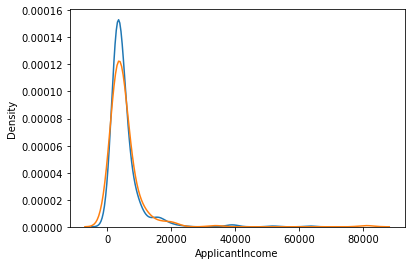

In [56]:
sns.kdeplot(df_acc)
sns.kdeplot(df_rej)

In [57]:
kstest(df_acc,df_rej)

KstestResult(statistic=0.04393759873617693, pvalue=0.9480203334325084)

In [59]:
bins=[0, 2500, 4000, 6000, 8000, 10000, 81000]
labels=['Low','Average','medium', 'h1', 'h2', 'Very high']
df["Income_bins"]=pd.cut(df["ApplicantIncome"],bins=bins,labels=labels)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bins
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,medium
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,medium
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,Average
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,medium
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,h2
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,h1


In [61]:
va1=pd.crosstab(df["Income_bins"],df["Loan_Status"])
va1

Loan_Status,N,Y
Income_bins,,
Low,34,74
Average,67,159
medium,45,98
h1,20,34
h2,9,22
Very high,17,35


In [62]:
chi2_contingency(va1)

(1.2390175474316056,
 0.941079844721327,
 5,
 array([[ 33.77198697,  74.22801303],
        [ 70.67100977, 155.32899023],
        [ 44.71661238,  98.28338762],
        [ 16.88599349,  37.11400651],
        [  9.69381107,  21.30618893],
        [ 16.26058632,  35.73941368]]))

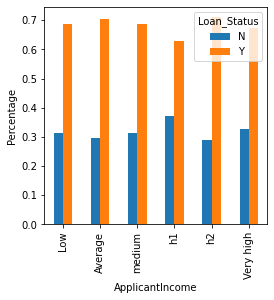

In [64]:
Income_bin = pd.crosstab(df["Income_bins"],df["Loan_Status"])

Income_bin.div(Income_bin.sum(axis=1),axis=0).plot(kind="bar",figsize=(4,4))
plt.xlabel("ApplicantIncome")
plt.ylabel("Percentage")
plt.show()

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

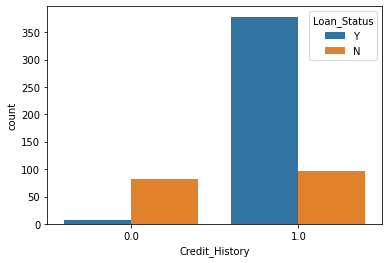

In [65]:
sns.countplot(x=df["Credit_History"],hue=df["Loan_Status"])

In [66]:
va2=pd.crosstab(df["Credit_History"],df["Loan_Status"])
va2

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


In [67]:
chi2_contingency(va2)

(174.63729658142535,
 7.184759548750746e-40,
 1,
 array([[ 28.2464539,  60.7535461],
        [150.7535461, 324.2464539]]))

# Univariate Analysis

# Binning the income

In [71]:
def check_ttest(x,y,alpha):
    _,p_value=ttest_ind(x,y)
    if p_value < alpha:
        print("Feature x is a good Predictor")
    else :
        print("Feature x is a bad Predictor")

In [72]:
check_ttest(df_acc,df_rej,0.05)

Feature x is a bad Predictor


In [ ]:
for i in cat_columns:
    

In [79]:
cat_cols_series=df.dtypes=="object"
cat_columns=list(cat_cols_series[cat_cols_series].index)
cat_columns

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [80]:
cat_columns.remove("Loan_ID")

In [86]:
# cat_columns.remove("Dependents")
# cat_columns.remove("Loan_Status")


In [106]:
def check_chi2Contingency(x,y,alpha):
    va=pd.crosstab(x,y)
    _,p_value,_,_=chi2_contingency(va)
    if p_value < alpha:
        print(f"Feature {x.name} is a good Predictor for target variable Loan Status")
    else :
        print(f"Feature {x.name} is a bad Predictor for target variable Loan Status")

In [107]:
cat_columns

['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

In [108]:
for col in cat_columns:
    check_chi2Contingency(df[col],df["Loan_Status"],0.05)

Feature Gender is a bad Predictor for target variable Loan Status
Feature Married is a good Predictor for target variable Loan Status
Feature Education is a good Predictor for target variable Loan Status
Feature Self_Employed is a bad Predictor for target variable Loan Status
Feature Property_Area is a good Predictor for target variable Loan Status
